In [147]:
import pandas as pd
from matplotlib import pyplot as plt
import os

In [148]:
record_folder = './checkpoints/memory_records'
available_records = os.listdir(record_folder)
print(available_records)

['test2.csv', 'test1.csv']


In [149]:

df = pd.read_csv(record_folder + '/' + 'test2.csv')
print(df.columns)



Index(['state', 'action', 'reward', 'done', 'shard_events', 'new_state'], dtype='object')


In [150]:
x = []
y = []
event_x = []
event_y = []
event_type = []
food_x = []
food_y = []
water_x = []
water_y = []
for _ ,row in df.iterrows():
    state = eval(row['state'])
    x.append(state[1])
    y.append(state[2])
    
    food_x.append(state[4])
    food_y.append(state[5])
    food_x.append(state[7])
    food_y.append(state[8])
    
    water_x.append(state[10])
    water_y.append(state[11])
    water_x.append(state[13])
    water_y.append(state[14])
    

    if row['shard_events'] != '[]':
        event_x.append(x[-1])
        event_y.append(y[-1])
        event_type.append(row['shard_events'])

In [151]:
agent_df = pd.DataFrame(data={'x':x, 'y':y})
print(agent_df.head(), len(agent_df))

food_df = pd.DataFrame(data={'x':food_x, 'y':food_y})
print(food_df.head(), len(food_df))

water_df = pd.DataFrame(data={'x':water_x, 'y':water_y})
print(water_df.head(), len(water_df))

     x    y
0  5.0  3.0
1  5.0  2.0
2  4.0  2.0
3  4.0  3.0
4  3.0  3.0 900
     x    y
0  2.0  2.0
1  4.0  4.0
2  2.0  2.0
3  4.0  4.0
4  2.0  2.0 1800
     x    y
0  3.0  1.0
1  0.0  2.0
2  3.0  1.0
3  0.0  2.0
4  3.0  1.0 1800


In [152]:
event_df = pd.DataFrame(data={'x':event_x, 'y':event_y, 'event_type':event_type})
print(len(event_df))

670


In [153]:
print(event_df.head())


     x    y          event_type
0  5.0  3.0  [('curiosity', 1)]
1  5.0  2.0     [('hunger', 1)]
2  4.0  2.0     [('hunger', 1)]
3  4.0  3.0     [('hunger', 1)]
4  3.0  3.0     [('hunger', 1)]


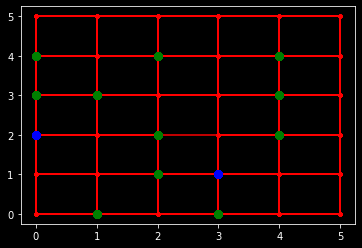

In [154]:

plt.plot(agent_df['x'], agent_df['y'], '.r-')
plt.plot(food_df['x'], food_df['y'], '.g', markersize=15)
plt.plot(water_df['x'], water_df['y'], '.b', markersize=15)
plt.show()
